<div style="padding:20px;
            color:black;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">Customer Personality Analysis</div>

**DataSet Link : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis**

### `Import Libraries`

In [1]:
## main Libraries
import numpy as np
import pandas as pd

## Datetime , i will need it in feature engineering step
from datetime import date

## Vis. Libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
from yellowbrick.cluster import KElbowVisualizer

## preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler

## decomposition
from sklearn.decomposition import PCA

## CLustering
from sklearn.cluster import KMeans ##, AgglomerativeClustering
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## setting some Libraries
pd.set_option('display.max_columns', None)
sns.set(rc={"figure.figsize" : [12,8]}, font_scale=1.2 , style='darkgrid')
## Set the figure and axes face color
sns.set(rc={"axes.facecolor": "#FFE4D9", "figure.facecolor": "#FFE4D9"})
## custom palette
custom_palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set_palette(custom_palette)
pio.templates.default = "ggplot2"
init_notebook_mode(connected=True)

### `Load Data`

In [2]:
data_pca_final = pd.read_csv("output/04_model_data.csv")

In [3]:
df_final = pd.read_csv("output/final_data.csv")

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700">5 <span style='color:#CDA63A'>|</span> Clustering
</div>

## <b>5.1 <span style='color:#682F2F'> KMeans Algorithm </span></b>

#### 5.1.1 Plot Elbow Method Using KElbowVisualizer From yellowbrick Library
**Source : https://pypi.org/project/yellowbrick/**

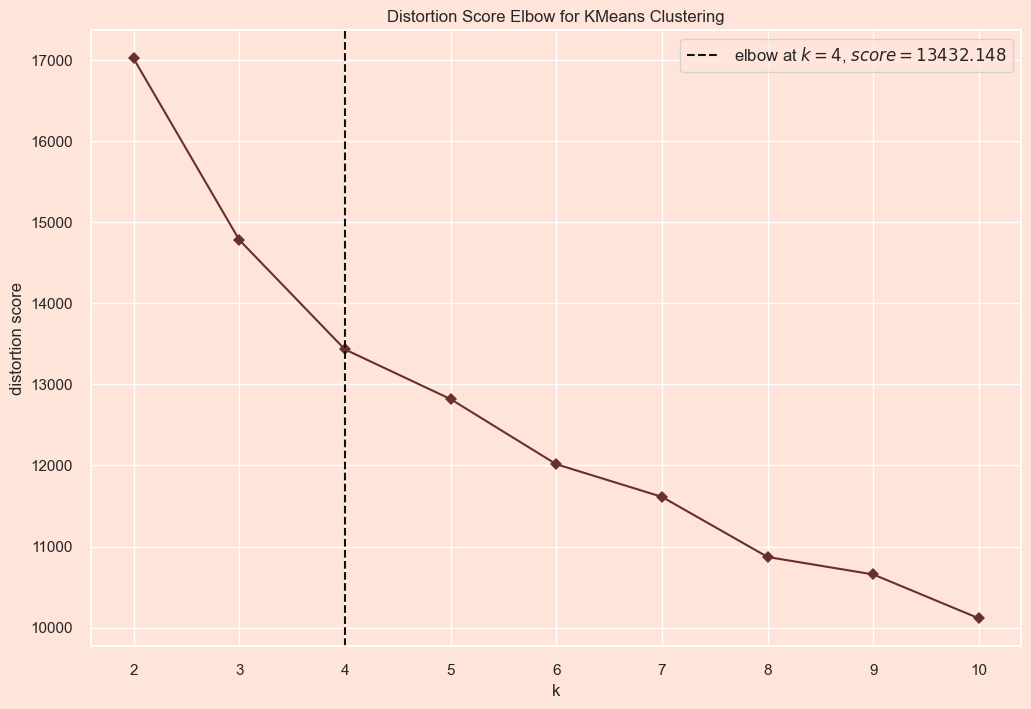

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
best_k = KElbowVisualizer(KMeans(), k=10, timings=False)
best_k.fit(data_pca_final)
best_k.show()

**Best K According to Elbow Method = 4**

#### 5.1.2 Train the Algorithm


In [5]:
kmeans_cluster = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=50) ## Create instance from kmeans 
kmeans_cluster.fit(data_pca_final) 

KMeans(n_clusters=4, n_init=50, random_state=42)

In [6]:
kmeans_cluster.inertia_

13431.027575163282

In [7]:
cluster_labels = kmeans_cluster.predict(data_pca_final)

In [8]:
data_pca_final["cluster_labels"] = cluster_labels
data_pca_final["cluster_labels"].value_counts()

cluster_labels
1    1014
0     516
3     421
2     264
Name: count, dtype: int64

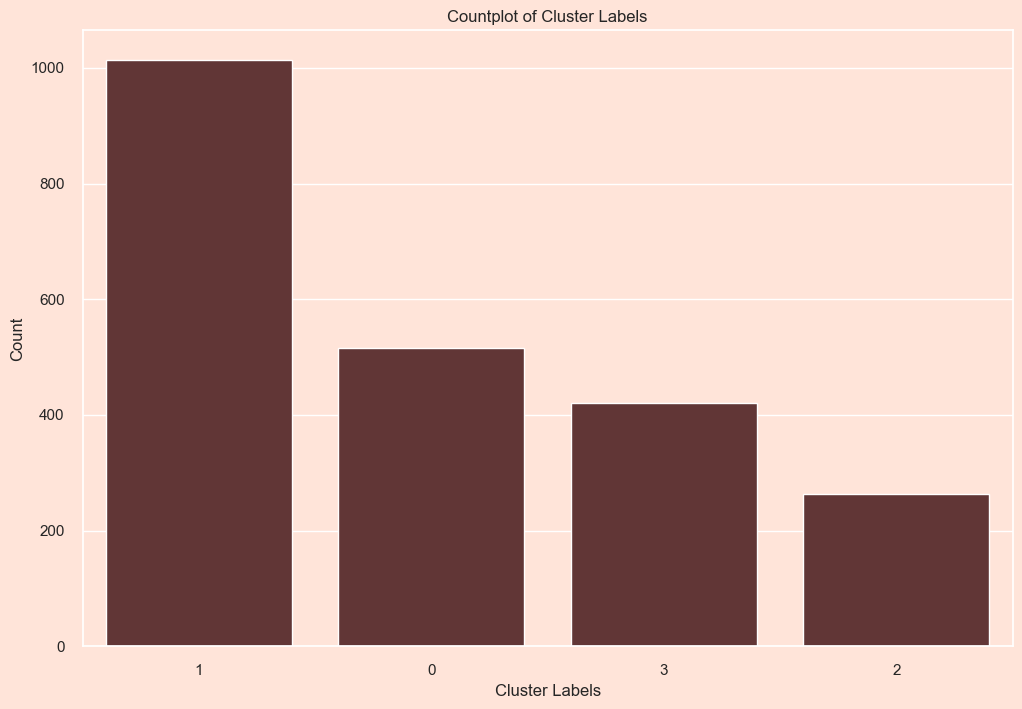

In [9]:
## Count plot for Cluster labels 
sns.countplot(data=data_pca_final, x="cluster_labels", 
              order=data_pca_final["cluster_labels"].value_counts().index)

# Set the title and axis labels
plt.title('Countplot of Cluster Labels')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')

plt.show()

In [10]:
clus_centroids = kmeans_cluster.cluster_centers_ ## Location of centroids

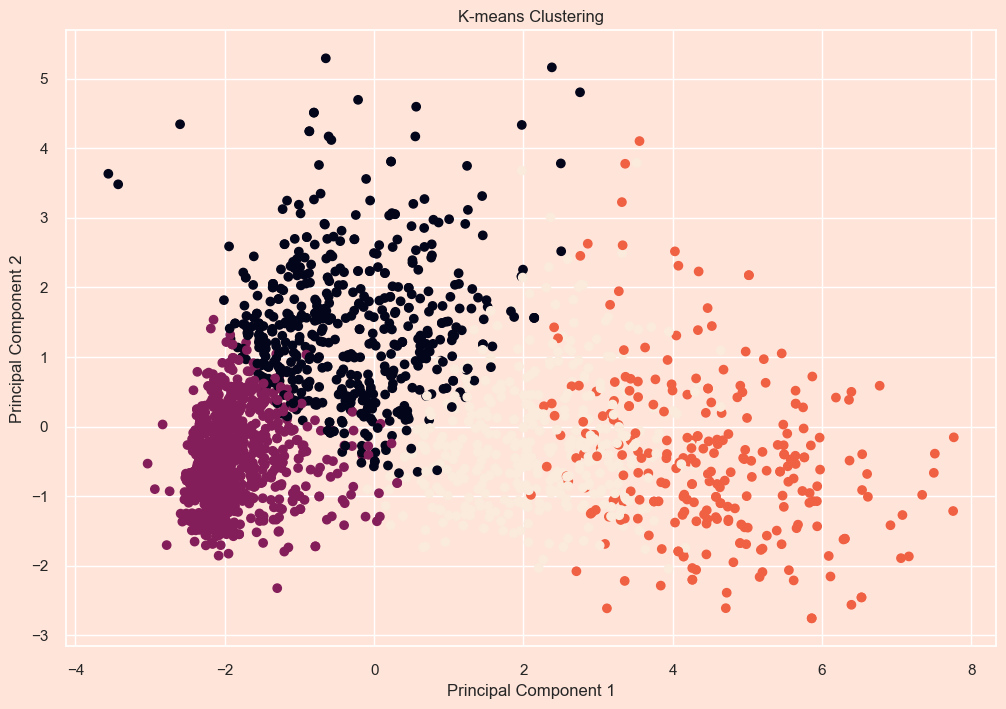

In [11]:
plt.scatter(data_pca_final.iloc[:, 0], data_pca_final.iloc[:, 1], c=cluster_labels) 

# Set the title and axis labels
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

### `Comparing the Clusters with Annual Income and Spending`

In [12]:
df_final["cluster_labels"] = data_pca_final["cluster_labels"]

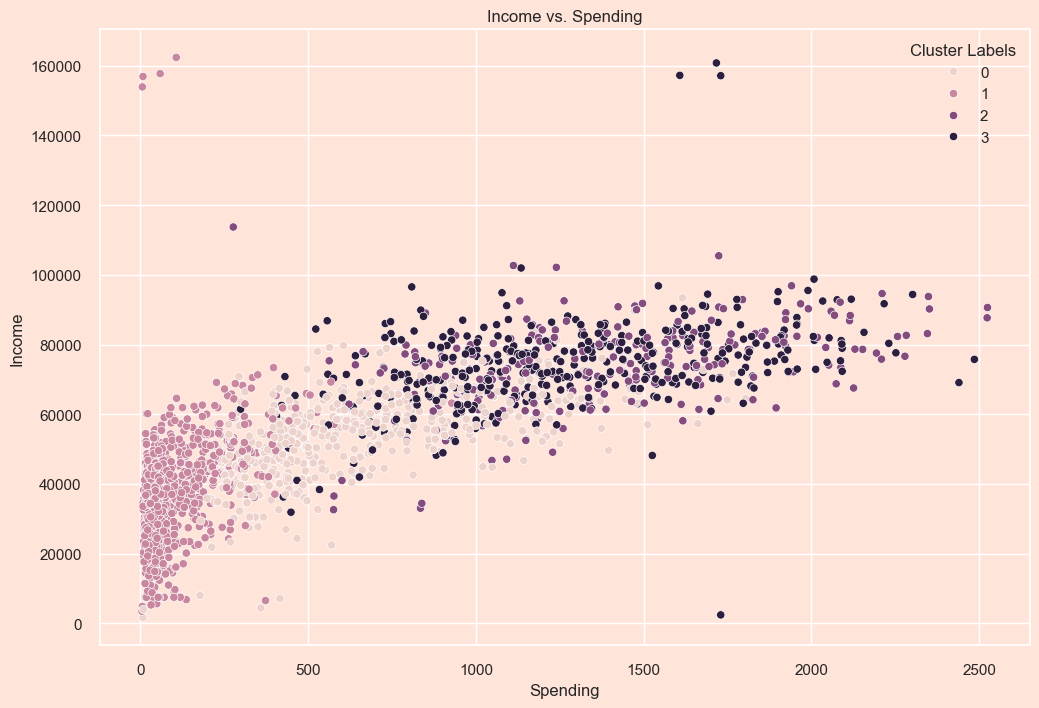

In [13]:
## scatter plot
scatter_plot = sns.scatterplot(data=df_final, y="Income", x="Spending", hue="cluster_labels")

## Customize the plot
scatter_plot.set_title("Income vs. Spending")
scatter_plot.set_xlabel("Spending")
scatter_plot.set_ylabel("Income")
scatter_plot.legend(title="Cluster Labels")

plt.show()

**From the above chart, We Have 4 Clusters**

- `Cluster 0` : **Average Spenging and Average Income**

- `Cluster 1` : **Low Spending and Low Income**

- `Cluster 2` : **High Spending and High Income**

- `Cluster 3` : **High Spending and High Income**

- `"Cluster 2 and 3 are almost the same"`

In [14]:
df_final.groupby("cluster_labels")[["Income","Spending"]].mean()

,Income,Spending
cluster_labels,,
0,54481.282946,663.517442
1,35639.106509,99.386588
2,74659.878788,1398.159091
3,73996.767221,1265.914489


In [15]:
df_final.to_csv("output/05_final_results.csv", index=False)

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:120%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700"> If you find the notebook helpful, please give it an upvote. If you have any comments, please let me know, and I'll be happy.
</div>

<a id="1"></a>
<div style="padding:20px;
            color:black;
            margin:10;
            font-size:150%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#D6B2B1;
            overflow:hidden;
            font-weight:700"> Done ✌
</div>